In [26]:
import psycopg2
import pandas as pd
from prophet import Prophet
import datetime
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [9]:
connection = psycopg2.connect(
    host = 'XXX.XXX.us-east-2.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = 'XXX',
    database='XXX'
    )
cursor=connection.cursor()

In [10]:
sql = """
SELECT "table_name","column_name", "data_type", "table_schema"
FROM INFORMATION_SCHEMA.COLUMNS
WHERE "table_schema" = 'public'
ORDER BY table_name  
"""
pd.read_sql(sql, con=connection)

,table_name,column_name,data_type,table_schema
0,FPIS,NAME,character varying,public
1,FPIS,FIPS_ID,integer,public
2,TEMPERATURE,DATE,date,public
3,TEMPERATURE,Country,character varying,public
4,TEMPERATURE,AverageTemperatureUncertaintyF,numeric,public
5,TEMPERATURE,STATE,character varying,public
6,TEMPERATURE,TEMPERATURE_ID,integer,public
7,TEMPERATURE,Fahrenheit,numeric,public
8,TEMPERATURE,AverageTemperatureF,numeric,public
9,USDisaster,pa_program_declared,integer,public


In [22]:
sql_USDisaster = """ SELECT * FROM public."USDisaster" ORDER BY declaration_date DESC """
disaster_df = pd.read_sql(sql_USDisaster, con=connection)
disaster_df

,fema_declaration,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,FM-5416-CA,5416,CA,FM,2021-08-25,2021,Fire,French Fire,0,0,1,1,2021-08-24,6029,99029,Kern (County),21088,b2120fdada11e2ceefe3714927afe2443c719812,2021-08-25,61266e5e434e34d5eee6f25e
1,DR-4610-CA,4610,CA,DR,2021-08-24,2021,Fire,Wildfires,1,0,1,1,2021-07-14,6063,99063,Plumas (County),21087,d615785ddbaca2e0dbb66805d84246680c86f560,2021-08-25,6125a937434e34d5ee5cd8af
2,DR-4610-CA,4610,CA,DR,2021-08-24,2021,Fire,Wildfires,1,0,1,1,2021-07-14,6057,99057,Nevada (County),21087,dde89f65556f220034ac16cfa66abf7d135962da,2021-08-25,6125a937434e34d5ee5cd8c1
3,DR-4610-CA,4610,CA,DR,2021-08-24,2021,Fire,Wildfires,1,0,1,1,2021-07-14,6035,99035,Lassen (County),21087,74f77c93f158659bf1dd9f871227a9993244478d,2021-08-25,6125a937434e34d5ee5cd8a3
4,DR-4610-CA,4610,CA,DR,2021-08-24,2021,Fire,Wildfires,1,0,1,1,2021-07-14,6061,99061,Placer (County),21087,6e1ab1c91a9838148684d35413b598c5ea66df71,2021-08-25,6125a937434e34d5ee5cd8b6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61801,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,Floods,0,1,1,1,1953-06-06,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13,60c3b7a9a0ee349d71025774
61802,DR-4-MI,4,MI,DR,1953-06-02,1953,Tornado,Tornado,0,1,1,1,1953-06-02,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13,60c3b7a9a0ee349d7102577a
61803,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,Flood,0,1,1,1,1953-05-29,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13,60c3b7a9a0ee349d71025777
61804,DR-2-TX,2,TX,DR,1953-05-15,1953,Tornado,Tornado & Heavy Rainfall,0,1,1,1,1953-05-15,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13,60c3b7a9a0ee349d71025783


In [23]:
sql_PostalAbreviation = """ SELECT * FROM public."USStates" ORDER BY "PostalAbreviation" ASC """
states_df = pd.read_sql(sql_PostalAbreviation, con=connection)

In [46]:
sql_fpis = """ SELECT * FROM public."FPIS" ORDER BY "FIPS_ID" ASC """
fpis_df = pd.read_sql(sql_fpis, con=connection)

In [47]:
sql_temp = """ SELECT * FROM public."TEMPERATURE" ORDER BY "TEMPERATURE_ID" ASC """
temp_df = pd.read_sql(sql_temp, con=connection)

In [27]:
disaster_df.dtypes

fema_declaration              object
disaster_number                int64
state                         object
declaration_type              object
declaration_date              object
fy_declared                    int64
incident_type                 object
declaration_title             object
ih_program_declared            int64
ia_program_declared            int64
pa_program_declared            int64
hm_program_declared            int64
incident_begin_date           object
fips                           int64
place_code                    object
designated_area               object
declaration_request_number     int64
hash                          object
last_refresh                  object
id                            object
dtype: object

In [31]:
# change incident begin date to datetime format
disaster_df["incident_begin_date"]= pd.to_datetime(disaster_df["incident_begin_date"])
disaster_df.dtypes

fema_declaration                      object
disaster_number                        int64
state                                 object
declaration_type                      object
declaration_date                      object
fy_declared                            int64
incident_type                         object
declaration_title                     object
ih_program_declared                    int64
ia_program_declared                    int64
pa_program_declared                    int64
hm_program_declared                    int64
incident_begin_date           datetime64[ns]
fips                                   int64
place_code                            object
designated_area                       object
declaration_request_number             int64
hash                                  object
last_refresh                          object
id                                    object
dtype: object

In [33]:
# filter dataframe to. only diasters in TX
df_filtered = disaster_df[disaster_df["state"] == "TX"]
df_filtered.head()

,fema_declaration,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
604,DR-4586-TX,4586,TX,DR,2021-02-19,2021,Severe Ice Storm,Severe Winter Storms,1,0,1,1,2021-02-11,48477,99477,Washington (County),21013,9c8705c29e0c7daf5af7a42fca3beae6313afbd6,2021-07-13,60c3b874a0ee349d710be84c
605,DR-4586-TX,4586,TX,DR,2021-02-19,2021,Severe Ice Storm,Severe Winter Storms,1,0,1,1,2021-02-11,48499,99499,Wood (County),21013,e9d17ea39bc60d70fde74bde5ebf2a9ba8f5519b,2021-07-13,60c3b874a0ee349d710be888
606,DR-4586-TX,4586,TX,DR,2021-02-19,2021,Severe Ice Storm,Severe Winter Storms,1,0,1,1,2021-02-11,48497,99497,Wise (County),21013,61441a1eea4446ff22b348d0ed6c34d81932e570,2021-07-13,60c3b874a0ee349d710be883
607,DR-4586-TX,4586,TX,DR,2021-02-19,2021,Severe Ice Storm,Severe Winter Storms,1,0,1,1,2021-02-11,48471,99471,Walker (County),21013,182253f33c1ef75b0be48effc7b987c1a9d1c05b,2021-07-13,60c3b874a0ee349d710be877
608,DR-4586-TX,4586,TX,DR,2021-02-19,2021,Severe Ice Storm,Severe Winter Storms,1,0,1,1,2021-02-11,48493,99493,Wilson (County),21013,458456f7492cc9613a9a537388c23dc427676aa7,2021-07-13,60c3b874a0ee349d710be876


In [34]:
# group dataframe by incident. begin date
df_groupby = df_filtered.groupby("incident_begin_date").count()
df_groupby.head()

,fema_declaration,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
incident_begin_date,,,,,,,,,,,,,,,,,,,
1953-05-15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1953-06-19,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1954-07-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1957-04-29,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1958-06-06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
# check values in incident type
df_groupby["incident_type"]

incident_begin_date
1953-05-15      1
1953-06-19      1
1954-07-01      1
1957-04-29      1
1958-06-06      1
             ... 
2019-09-17      7
2020-01-20    515
2020-07-25     32
2020-08-23     67
2021-02-11    508
Name: incident_type, Length: 274, dtype: int64

In [36]:
# reset index
df_groupby = df_groupby.reset_index()

In [37]:
# set values for data and headers for prophet df
data = [df_groupby["incident_begin_date"], df_groupby["incident_type"]]
headers=["ds", "y"]

In [38]:
# create prophete DF
df_prophet = pd.concat(data, axis=1, keys=headers)
df_prophet.head()

,ds,y
0,1953-05-15,1
1,1953-06-19,1
2,1954-07-01,1
3,1957-04-29,1
4,1958-06-06,1


In [40]:
# check dtypes
df_prophet.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [41]:
# fit model
m = Prophet()
m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
# generate future periods
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
634,2022-02-07
635,2022-02-08
636,2022-02-09
637,2022-02-10
638,2022-02-11


In [43]:
# predict values for future periods
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
634,2022-02-07,134.680278,67.604603,200.451781
635,2022-02-08,111.309035,40.105257,179.650991
636,2022-02-09,104.536952,35.057754,175.772831
637,2022-02-10,105.546649,40.261699,176.934468
638,2022-02-11,101.828923,28.403007,170.195258


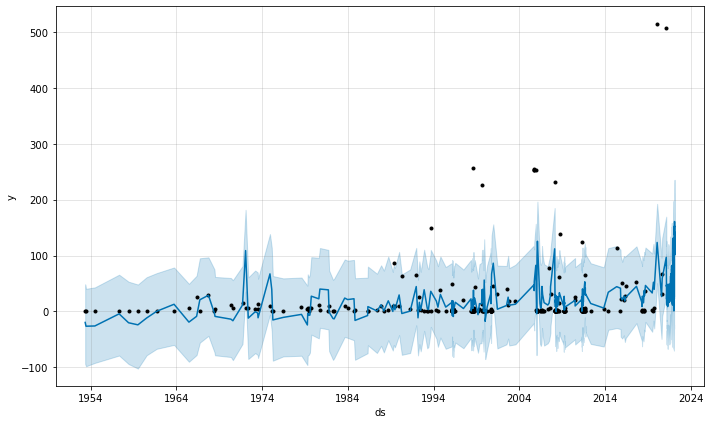

In [44]:
# plot forecast
fig1 = m.plot(forecast)


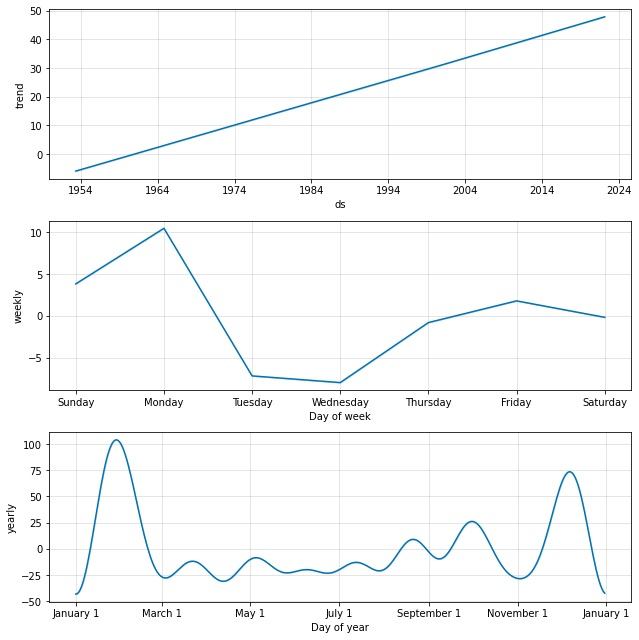

In [45]:
fig2 = m.plot_components(forecast)


In [63]:
# change date to datetime
temp_df["DATE"]= pd.to_datetime(temp_df["DATE"])
temp_df.dtypes

TEMPERATURE_ID                             int64
DATE                              datetime64[ns]
STATE                                     object
Country                                   object
Fahrenheit                               float64
AverageTemperatureF                      float64
AverageTemperatureUncertaintyF           float64
dtype: object

In [65]:
# filter data frame to DF
temp_filtered = temp_df[temp_df["STATE"] == "New York"]


In [68]:
# sort by date
temp_sorted = temp_filtered.sort_values("DATE")
temp_sorted.head()

,TEMPERATURE_ID,DATE,STATE,Country,Fahrenheit,AverageTemperatureF,AverageTemperatureUncertaintyF
23326,23327,1953-01-01,New York,United States,10.571,27.7142,32.3546
23327,23328,1953-02-01,New York,United States,12.524,28.1048,32.2610
23328,23329,1953-03-01,New York,United States,47.228,35.0456,32.1494
23329,23330,1953-04-01,New York,United States,90.365,43.6730,32.3996
23330,23331,1953-05-01,New York,United States,158.153,57.2306,32.5544


In [69]:
# assign values to prohet df 2
data2 = [temp_sorted["DATE"], temp_sorted["AverageTemperatureF"]]
headers2=["ds", "y"]

In [70]:
# create prophete DF
df_prophet2 = pd.concat(data2, axis=1, keys=headers2)
df_prophet2.head()

,ds,y
23326,1953-01-01,27.7142
23327,1953-02-01,28.1048
23328,1953-03-01,35.0456
23329,1953-04-01,43.6730
23330,1953-05-01,57.2306


In [77]:
m2 = Prophet(seasonality_mode='multiplicative').fit(df_prophet2)
future2 = m2.make_future_dataframe(periods=120, freq='MS')
fcst2 = m.predict(future2)
fcst2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
844,2023-05-01,48.867704,-18.800270,119.748291
845,2023-06-01,26.319032,-44.778399,95.328157
846,2023-07-01,28.436401,-42.759687,101.745202
847,2023-08-01,21.776600,-51.400089,90.812906
848,2023-09-01,48.657215,-21.153273,120.957474


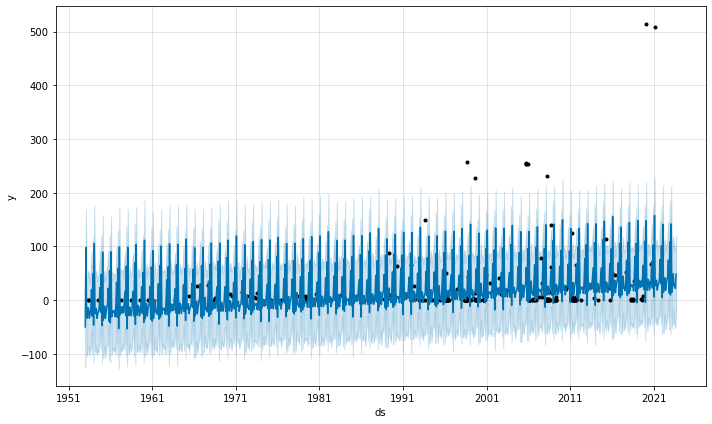

In [78]:
fig2 = m.plot(fcst2)